# Data processing 2

## Contents <a id=ov>
7. [Plotting](#plt)
8. [Statsmodels](#sm)
9. [Sklearn](#sm)




In [2]:
import numpy as np
import pandas as pd
#Import data from a excel_file
df=pd.read_excel('top_500_football_players.xlsx',sheet_name='final')

df['Market value'] = [float(value.replace('€','').replace('m','')) for value in df['Market value']]

df.columns=[col.replace(' ','_') for col in df.columns]
print(df)

C:\Users\myfix\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


       #          Player            Position  Age  Market_value  Matches  \
0      1   Kylian Mbappé      Centre-Forward   22         160.0       11   
1      2  Erling Haaland      Centre-Forward   21         150.0        8   
2      3      Harry Kane      Centre-Forward   28         120.0       10   
3      4   Jack Grealish         Left Winger   26         100.0       10   
4      5   Mohamed Salah        Right Winger   29         100.0        9   
..   ...             ...                 ...  ...           ...      ...   
495  496      Tom Davies    Central Midfield   23          18.0        5   
496  497   Hans Hateboer          Right-Back   27          18.0        0   
497  498      David Raya          Goalkeeper   26          18.0        7   
498  499    Gregor Kobel          Goalkeeper   23          18.0       12   
499  500  Wilmar Barrios  Defensive Midfield   27          18.0       10   

     Goals  Own_goals  Assists  Yellow_cards  Yellow_red_cards  Red_cards  \
0        4

## Plotting <a id=plt>
[Back to Content Overview](#ov)

The most popular liberary for creating plots in Python is Matplotlib:

In [3]:
import sys
!{sys.executable} -m pip install matplotlib
import matplotlib.pyplot as plt

### Standard plot

In [4]:
df_most_valuable=df.drop_duplicates(subset=['Age']).sort_values(by=['Age'])
print(df_most_valuable)

       #              Player            Position  Age  Market_value  Matches  \
480  481   Youssoufa Moukoko      Centre-Forward   16          18.0       10   
16    17               Pedri    Central Midfield   18          80.0        5   
118  119         Nuno Mendes           Left-Back   19          40.0       10   
28    29     Alphonso Davies           Left-Back   20          70.0       10   
1      2      Erling Haaland      Centre-Forward   21         150.0        8   
0      1       Kylian Mbappé      Centre-Forward   22         160.0       11   
13    14     Marcus Rashford         Left Winger   23          85.0        0   
9     10     Frenkie de Jong    Central Midfield   24          90.0        8   
31    32               Rodri  Defensive Midfield   25          70.0        8   
3      4       Jack Grealish         Left Winger   26         100.0       10   
10    11     Bruno Fernandes  Attacking Midfield   27          90.0       11   
2      3          Harry Kane      Centre

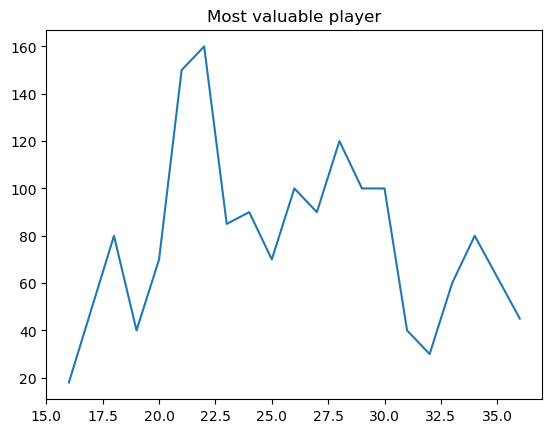

In [5]:
# Plot the market value of the most valuable player of each age.
plt.plot(df_most_valuable['Age'],df_most_valuable['Market_value'])
plt.title('Most valuable player')
plt.savefig('Most valuable player.pdf')

In [6]:
# Jupyter Shows plots automatically
plt.show()

<span style="color:blue"><b>Task:</b></span> Plot the mean of Market value of players of each age.

     Market_value
Age              
16      18.000000
18      52.222222
19      24.333333
20      31.526316
21      36.939394
22      38.951220
23      30.372549
24      33.890411
25      30.309091
26      38.375000
27      34.522727
28      36.533333
29      44.866667
30      35.076923
31      28.250000
32      25.000000
33      35.000000
34      80.000000
36      45.000000
    Age  Market_value
0    16     18.000000
1    18     52.222222
2    19     24.333333
3    20     31.526316
4    21     36.939394
5    22     38.951220
6    23     30.372549
7    24     33.890411
8    25     30.309091
9    26     38.375000
10   27     34.522727
11   28     36.533333
12   29     44.866667
13   30     35.076923
14   31     28.250000
15   32     25.000000
16   33     35.000000
17   34     80.000000
18   36     45.000000


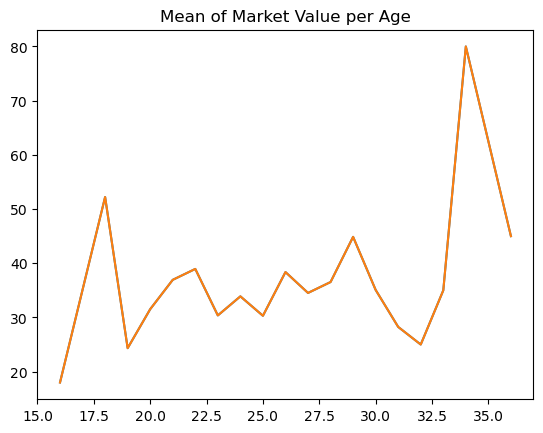

In [7]:
# Option 1
df_agg=df[['Market_value','Age']].groupby('Age').mean()
print(df_agg)

plt.plot(df_agg.index,df_agg['Market_value'])
# Option 2
df_agg=df[['Market_value','Age']].groupby('Age').mean().reset_index()
print(df_agg)

plt.plot(df_agg['Age'],df_agg['Market_value'])

plt.title('Mean of Market Value per Age')
plt.savefig('Mean of Market Value per Age.pdf')

Text(0.5, 1.0, 'Most valuable player')

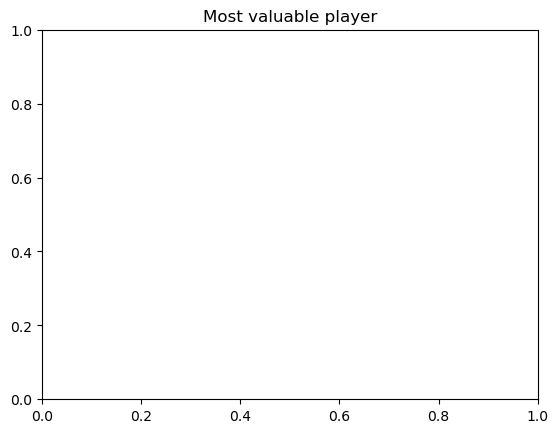

In [8]:
# Add title
plt.title('Most valuable player')

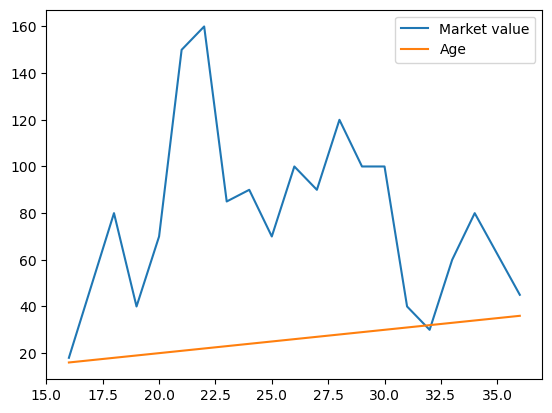

In [9]:
# Add legend
plt.plot(df_most_valuable['Age'],
         df_most_valuable['Market_value'],
         label='Market value')
plt.plot(df_most_valuable['Age'],
         df_most_valuable['Age'],
         label='Age')
plt.legend()

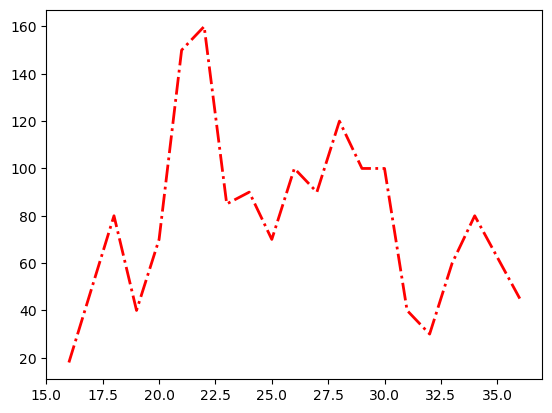

In [10]:
# Change design of the line
plt.plot(df_most_valuable['Age'],
         df_most_valuable['Market_value'],
         label='Most valuable Player',
         linewidth=2.0,
         color='red',
         linestyle='-.')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


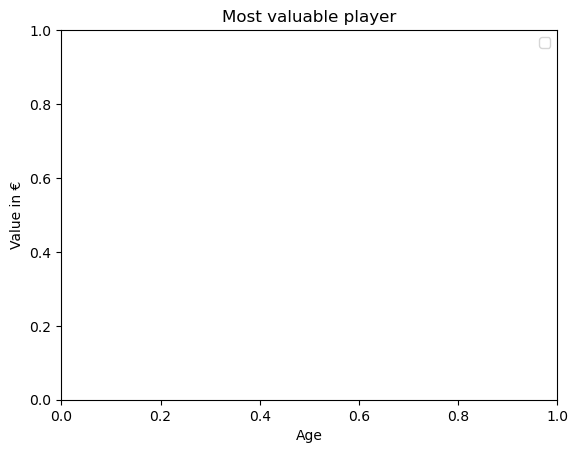

In [11]:
# Add labels to the axes
plt.xlabel('Age')
plt.ylabel('Value in €')
plt.title('Most valuable player')
plt.legend()

### Bar Plot

<BarContainer object of 19 artists>

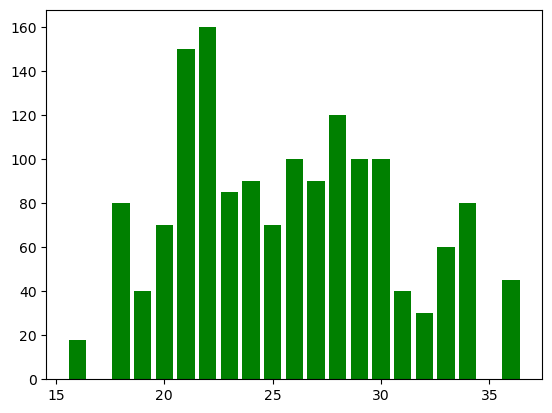

In [12]:
plt.bar(df_most_valuable['Age'],
        df_most_valuable['Market_value'],
        color='g')

### Scatter Plot

Text(0, 0.5, 'Value in €')

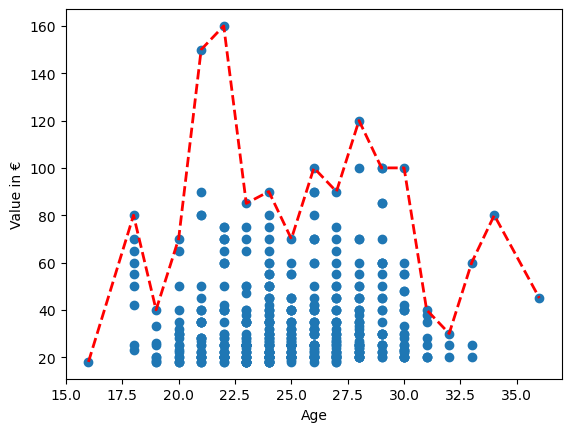

In [13]:
plt.scatter(df['Age'],df['Market_value'])
plt.plot(df_most_valuable['Age'],
         df_most_valuable['Market_value'],
         label='Market value',
         linewidth=2.0,
         color='red',
         linestyle='--')
plt.xlabel('Age')
plt.ylabel('Value in €')

### Histogramm

Text(0.5, 1.0, 'Age Distribution')

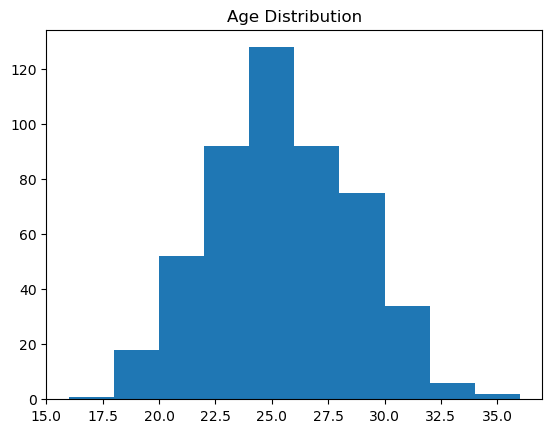

In [14]:
plt.hist(df['Age'])
plt.title('Age Distribution')

Text(0.5, 1.0, 'Market value Distribution')

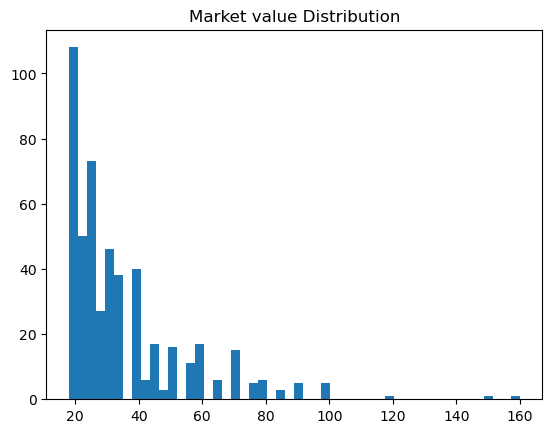

In [15]:
plt.hist(df['Market_value'],bins=50)
plt.title('Market value Distribution')

Text(0.5, 1.0, 'Market value Distribution')

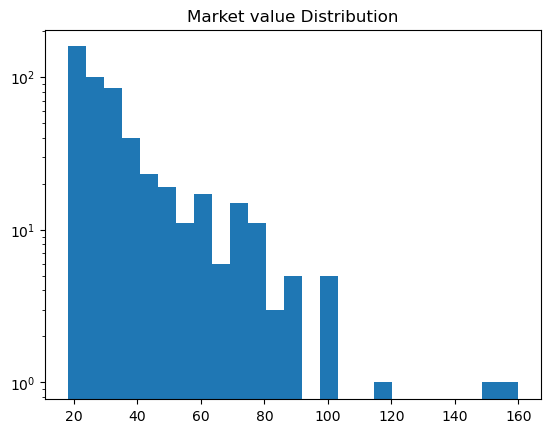

In [16]:
plt.hist(df['Market_value'],bins=25,log=True)
plt.title('Market value Distribution')

Text(0.5, 1.0, 'Scorer Points Distribution')

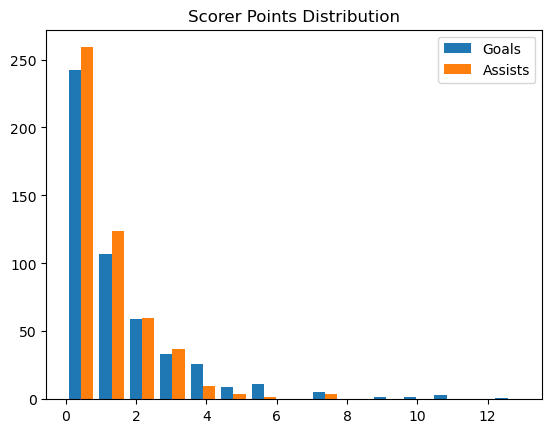

In [17]:
plt.hist(df[['Goals','Assists']],bins=15,label=['Goals','Assists'])
plt.legend()
plt.title('Scorer Points Distribution')

Text(0.5, 1.0, 'Scorer Points Distribution')

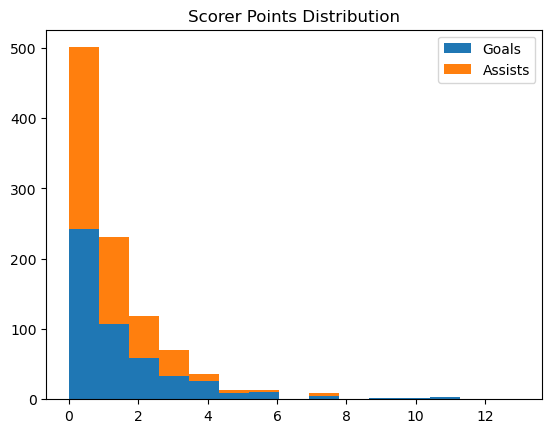

In [18]:
plt.hist(df[['Goals','Assists']],bins=15,histtype='barstacked',label=['Goals','Assists'])
plt.legend()
plt.title('Scorer Points Distribution')

### Subplots

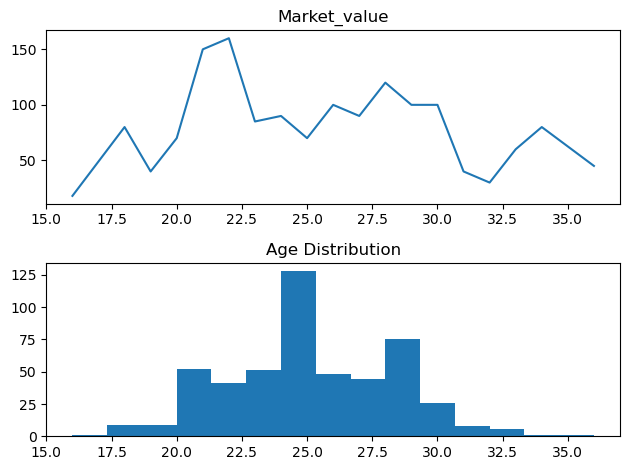

In [19]:
plt.figure(1)
plt.subplot(211)             
plt.plot(df_most_valuable['Age'],df_most_valuable['Market_value'])
plt.title('Market_value')
plt.subplot(212)
plt.hist(df['Age'],bins=15,)
plt.title('Age Distribution')

plt.tight_layout()


<span style="color:blue"><b>Task:</b></span> Plot the median age for every position in a bar plot!

              Position   Age
6        Left Midfield  23.0
0   Attacking Midfield  24.0
7          Left Winger  24.0
10        Right Winger  24.0
11          Right-Back  24.0
1     Central Midfield  25.0
2          Centre-Back  25.0
3       Centre-Forward  25.0
4   Defensive Midfield  25.0
9       Right Midfield  25.0
8            Left-Back  26.0
5           Goalkeeper  26.5
12      Second Striker  27.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Left Midfield'),
  Text(1, 0, 'Attacking Midfield'),
  Text(2, 0, 'Left Winger'),
  Text(3, 0, 'Right Winger'),
  Text(4, 0, 'Right-Back'),
  Text(5, 0, 'Central Midfield'),
  Text(6, 0, 'Centre-Back'),
  Text(7, 0, 'Centre-Forward'),
  Text(8, 0, 'Defensive Midfield'),
  Text(9, 0, 'Right Midfield'),
  Text(10, 0, 'Left-Back'),
  Text(11, 0, 'Goalkeeper'),
  Text(12, 0, 'Second Striker')])

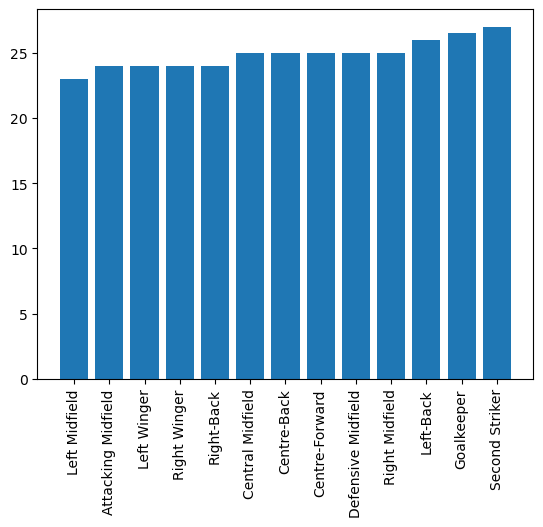

In [20]:
df_median=df.groupby('Position')['Age'].median().reset_index()
df_median=df_median.sort_values(by='Age')
print(df_median)
plt.bar(df_median['Position'],df_median['Age'])
plt.xticks(rotation=90)

<span style="color:blue"><b>Task:</b></span> Plot the mean of the market value for every age in line plot and in scatter plot!

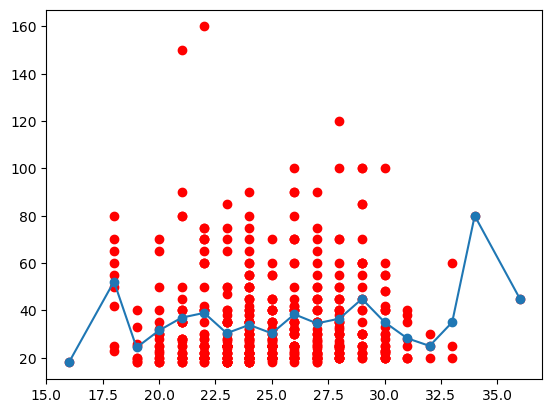

In [21]:
df_mean=df[['Market_value','Age']].groupby('Age').mean().reset_index()
plt.scatter(df['Age'],df['Market_value'],color='red')
plt.plot(df_mean['Age'],df_mean['Market_value'])
plt.scatter(df_mean['Age'],df_mean['Market_value'])


<span style="color:blue"><b>Task:</b></span> Plot the yellow and red cards in stacked histogram for 200 most valuable players!

(array([[ 74.,  73.,  37.,  12.,   3.,   1.],
        [268.,  79.,  37.,  12.,   3.,   1.]]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <a list of 2 BarContainer objects>)

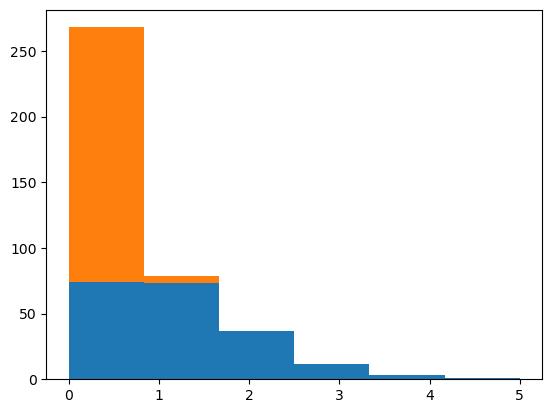

In [22]:
df_200=df.iloc[:200,:]

plt.hist(df_200[['Yellow_cards','Red_cards']],bins=6,histtype='barstacked')

<span style="color:blue"><b>Task:</b></span> Show the market value histogram of the every age quartile in a 2X2 subplot figure!

25.0
0 16.0 23.0
221
1 23.0 25.0
222
2 25.0 27.0
223
3 27.0 36.0
224


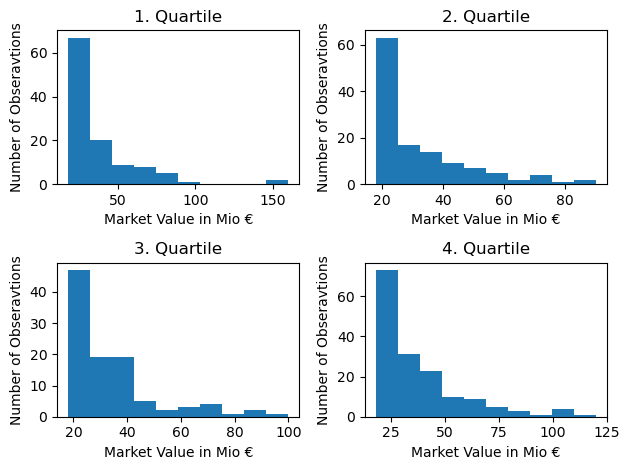

In [23]:
print(df['Age'].quantile())

plt.figure(1)

for i in range(4):
    lower_limit=df['Age'].quantile(i*0.25)
    upper_limit=df['Age'].quantile((i+1)*0.25)
    print(i,lower_limit,upper_limit)
    # Create a df with only the observations in the interval:
    df_filter=df[(df['Age']>=lower_limit)&(df['Age']<upper_limit)]
    
    #Choose the right subplot with plt.subplot(411)  (number of plots|row index|column index)
    print(f"{2}{2}{i+1}")
    plt.subplot(int(f"{2}{2}{i+1}"))
    # Plot the market value histogramm
    plt.hist(df_filter['Market_value'])
    plt.title(f"{i+1}. Quartile")
    plt.xlabel("Market Value in Mio €")
    plt.ylabel("Number of Obseravtions")
plt.tight_layout()    

In [24]:
def quantile_plot(plot_series: str,
                  filter_series:str,
                  n_shape: tuple,
                  file=None,
                  bins=None,
                  y_lim=100):
    
    print(df['Age'].quantile())

    plt.figure(1)
    
    n_plots=n_shape[0]*n_shape[1]
    
    for i in range(n_plots):
        lower_limit=df[filter_series].quantile(i/n_plots)
        upper_limit=df[filter_series].quantile((i+1)/n_plots)
        print(i,lower_limit,upper_limit)
        # Create a df with only the observations in the interval:
        df_filter=df[(df[filter_series]>=lower_limit)&(df[filter_series]<upper_limit)]

        #Choose the right subplot with plt.subplot(411)  (number of plots|row index|column index)
        print(f"{2}{2}{i+1}")
        plt.subplot(int(f"{n_shape[0]}{n_shape[1]}{i+1}"))
        # Plot the market value histogramm
        plt.hist(df_filter[plot_series],bins=bins)
        plt.title(f"{round(i/n_plots,2)}-{round((i+1)/n_plots,2)} Percentile")
        plt.xlabel(plot_series)
        #plt.ylabel("Number of Obseravtions")
        plt.ylim(top=y_lim)
        plt.xlim(df[plot_series].min(),df[plot_series].max())
    plt.tight_layout() 
    
    if file is not None:
        plt.savefig(file)


25.0
0 18.0 20.0
221
1 20.0 21.888888888888886
222
2 21.888888888888886 25.0
223
3 25.0 25.0
224
4 25.0 30.0
225
5 30.0 35.0
226
6 35.0 45.0
227
7 45.0 60.0
228
8 60.0 160.0
229


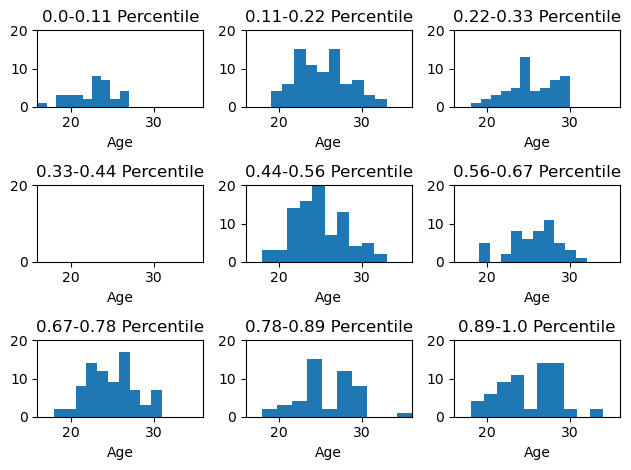

In [25]:
quantile_plot('Age','Market_value',n_shape=(3,3),bins=10,y_lim=20,file="best_plot.pdf")


## Statsmodels <a id=sm>
[Back to Content Overview](#ov)

With statsmodels you can regress in a R-fashioned simple way

In [26]:
import sys
!{sys.executable} -m pip install statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [27]:
df['Age2']=df['Age']**2
res=smf.ols('Market_value ~ Age + Age2 + Goals',data=df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Market_value   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     7.570
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           5.85e-05
Time:                        09:32:45   Log-Likelihood:                -2183.5
No. Observations:                 500   AIC:                             4375.
Df Residuals:                     496   BIC:                             4392.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.7786     40.948      1.045      0.2

In [28]:
#Get the estimated parameters
print(res.params)

Intercept    42.778613
Age          -1.068042
Age2          0.026036
Goals         1.979566
dtype: float64


In [29]:
#Get the standard errors
print(res.bse)

Intercept    40.947560
Age           3.266194
Age2          0.064739
Goals         0.443848
dtype: float64


In [30]:
#Get the predicted values
print(res.predict())

[39.8014482  53.60689948 45.1631759  36.56908973 51.51789377 41.20404334
 38.12902115 35.68136352 31.83167038 32.14242545 42.81966293 38.54865601
 34.58952345 31.9867681  43.59962864 39.64049608 31.9895663  31.83167038
 35.79080294 42.04025686 32.60995717 38.54254361 31.88318307 33.86274935
 31.9867681  32.14242545 32.92183152 35.94869886 31.83223002 37.82188192
 35.84231564 34.32972143 44.01982315 35.94590066 33.86274935 36.56908973
 34.90139781 33.28577821 40.5282223  34.58952345 33.28577821 33.70179723
 43.86696399 35.79136258 31.9867681  31.88318307 34.12199174 32.92183152
 33.96913258 31.88318307 38.0811243  31.88318307 31.88318307 32.14242545
 32.60995717 34.90139781 36.56908973 40.26842027 36.14945487 33.28577821
 33.70179723 33.70179723 33.70179723 33.70179723 61.62095831 35.94869886
 34.12199174 32.14242545 34.12199174 32.35015514 36.14945487 34.90139781
 36.30928771 34.16988859 33.28577821 33.70179723 39.90783143 37.77092887
 45.74014705 32.14242545 37.77036923 34.12199174 33

<span style="color:blue"><b>Task:</b></span> Plot a histogramm of the residuals and compare it with normal distributed values of the same mean and variance.

(array([ 2.,  1.,  0.,  0.,  0.,  3.,  2.,  2.,  2.,  3.,  6.,  6.,  6.,
         6.,  6., 14., 11., 19., 15., 12., 18., 18., 23., 26., 24., 26.,
        17., 20., 25., 16., 21., 16., 24., 15., 14.,  9.,  8.,  9., 10.,
         4., 16.,  2.,  7.,  3.,  3.,  3.,  2.,  2.,  0.,  3.]),
 array([-57.77607074, -55.56348044, -53.35089014, -51.13829984,
        -48.92570954, -46.71311924, -44.50052893, -42.28793863,
        -40.07534833, -37.86275803, -35.65016773, -33.43757743,
        -31.22498713, -29.01239682, -26.79980652, -24.58721622,
        -22.37462592, -20.16203562, -17.94944532, -15.73685501,
        -13.52426471, -11.31167441,  -9.09908411,  -6.88649381,
         -4.67390351,  -2.46131321,  -0.2487229 ,   1.9638674 ,
          4.1764577 ,   6.389048  ,   8.6016383 ,  10.8142286 ,
         13.02681891,  15.23940921,  17.45199951,  19.66458981,
         21.87718011,  24.08977041,  26.30236072,  28.51495102,
         30.72754132,  32.94013162,  35.15272192,  37.36531222,
         39.

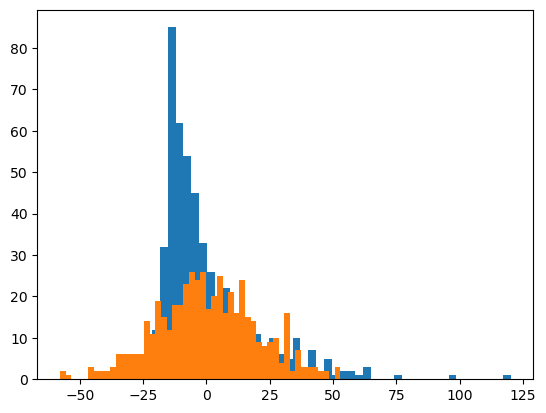

In [31]:
resid=df['Market_value']-res.predict()
resid=res.resid
#print(resid)
plt.hist(resid,bins=50)
randoms=np.random.normal(np.mean(resid),np.std(resid),size=500)
plt.hist(randoms,bins=50)

<span style="color:blue"><b>Task:</b></span> Make a scatter plot of the market value and the residuals.

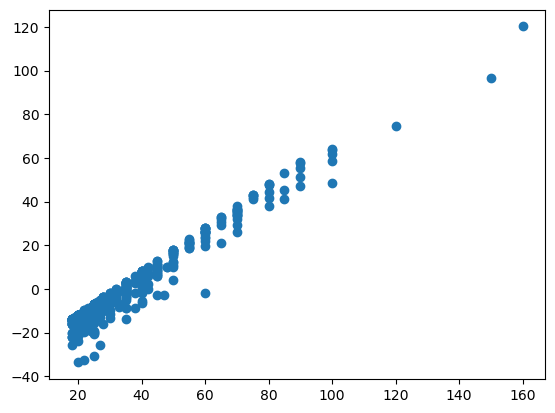

In [32]:
plt.scatter(df['Market_value'],res.resid)

In [33]:
res=smf.ols('np.log(Market_value) ~ Age + Goals',data=df).fit()
print(res.summary())

                             OLS Regression Results                             
Dep. Variable:     np.log(Market_value)   R-squared:                       0.035
Model:                              OLS   Adj. R-squared:                  0.031
Method:                   Least Squares   F-statistic:                     8.995
Date:                  Thu, 22 Feb 2024   Prob (F-statistic):           0.000145
Time:                          09:32:46   Log-Likelihood:                -297.57
No. Observations:                   500   AIC:                             601.1
Df Residuals:                       497   BIC:                             613.8
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1706      0.156

In [34]:
res=smf.ols('Market_value ~ Age + Goals + C(Position)',data=df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Market_value   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     2.215
Date:                Thu, 22 Feb 2024   Prob (F-statistic):            0.00667
Time:                        09:32:46   Log-Likelihood:                -2179.2
No. Observations:                 500   AIC:                             4388.
Df Residuals:                     485   BIC:                             4452.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [35]:
# Log-Model with position dummies
res=smf.ols('np.log(Market_value) ~ Age + Goals + C(Position)',data=df).fit()
print(res.summary())

                             OLS Regression Results                             
Dep. Variable:     np.log(Market_value)   R-squared:                       0.055
Model:                              OLS   Adj. R-squared:                  0.028
Method:                   Least Squares   F-statistic:                     2.032
Date:                  Thu, 22 Feb 2024   Prob (F-statistic):             0.0143
Time:                          09:32:46   Log-Likelihood:                -292.21
No. Observations:                   500   AIC:                             614.4
Df Residuals:                       485   BIC:                             677.6
Df Model:                            14                                         
Covariance Type:              nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

<span style="color:blue"><b>Task:</b></span> Estimate a linear model with age and position dummies.

In [36]:
res=smf.ols('Market_value ~ Age + Yellow_cards + C(Position)',data=df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Market_value   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9912
Date:                Thu, 22 Feb 2024   Prob (F-statistic):              0.461
Time:                        09:32:46   Log-Likelihood:                -2187.7
No. Observations:                 500   AIC:                             4405.
Df Residuals:                     485   BIC:                             4469.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

<span style="color:blue"><b>Task:</b></span> Use a logit model to estimate that a player is an offender. Use the explanatory variables that make sense to you!

In [37]:
offenders=['Second Striker','Centre-Forward','Left Winger','Right Winger']
df['is_offender'] = np.where(df['Position'].isin(offenders),1,0)
print(df['is_offender'])
df['is_offender'] = [  1 if position in offenders else 0 for position in df['Position']]
df['is_offender'] = [int(position in offenders) for position in df['Position']]
df['is_offender'] = df['Position'].isin(offenders).astype(int)





0      1
1      1
2      1
3      1
4      1
      ..
495    0
496    0
497    0
498    0
499    0
Name: is_offender, Length: 500, dtype: int32


<span style="color:blue"><b>Task:</b></span> Create a confusion matrix manually. Calculate the accuracy of the model.

In [38]:
matrix=np.zeros((2,2))
print(matrix)
for true,pred in zip(df['is_offender'],res.predict()):
    #print(true,pred,pred>0.5,true==1)
    row_index= 0 if pred>0.5 else 1
    col_index= 0 if true==1 else 1
    
    matrix[row_index,col_index]+=1
    
    
print(matrix)
    

[[0. 0.]
 [0. 0.]]
[[168. 332.]
 [  0.   0.]]


<span style="color:blue"><b>Task:</b></span> Use a balanced dataset (same number of offender and not offenders in the training dataset) and re-estimate the logit model.

In [39]:
df_off=df[df['is_offender']==1]
df_not=df[df['is_offender']==0].sample(len(df_off),random_state=42)
df_balanced=pd.concat([df_off,df_not],axis=0)
#print(df_balanced)
print(df_balanced['is_offender'].value_counts())

res=smf.logit('is_offender ~ Age + Goals+ Yellow_cards + Market_value',data=df_balanced).fit()
print(res.summary())
matrix=np.zeros((2,2))
print(matrix)
for true,pred in zip(df['is_offender'],res.predict()):
    #print(true,pred,pred>0.5,true==1)
    row_index= 0 if pred>0.5 else 1
    col_index= 0 if true==1 else 1
    
    matrix[row_index,col_index]+=1
print(matrix)

is_offender
1    168
0    168
Name: count, dtype: int64
Optimization terminated successfully.
         Current function value: 0.547612
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            is_offender   No. Observations:                  336
Model:                          Logit   Df Residuals:                      331
Method:                           MLE   Df Model:                            4
Date:                Thu, 22 Feb 2024   Pseudo R-squ.:                  0.2100
Time:                        09:32:46   Log-Likelihood:                -184.00
converged:                       True   LL-Null:                       -232.90
Covariance Type:            nonrobust   LLR p-value:                 2.892e-20
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.6887      1.037     -0.664   

##  Estimation with matrices

In [40]:
# You can also get the corresponding matrices for y and X
import patsy
var_string='Age + Goals + Yellow_cards + Yellow_red_cards + Red_cards + Substitutions_on + Substitutions_off + Age2'

y, X = patsy.dmatrices(f'Market_value ~ {var_string}', df, return_type="matrix")

print(y,X)

[[160.]
 [150.]
 [120.]
 [100.]
 [100.]
 [100.]
 [100.]
 [100.]
 [ 90.]
 [ 90.]
 [ 90.]
 [ 90.]
 [ 90.]
 [ 85.]
 [ 85.]
 [ 85.]
 [ 80.]
 [ 80.]
 [ 80.]
 [ 80.]
 [ 80.]
 [ 80.]
 [ 75.]
 [ 75.]
 [ 75.]
 [ 75.]
 [ 75.]
 [ 70.]
 [ 70.]
 [ 70.]
 [ 70.]
 [ 70.]
 [ 70.]
 [ 70.]
 [ 70.]
 [ 70.]
 [ 70.]
 [ 70.]
 [ 70.]
 [ 70.]
 [ 70.]
 [ 70.]
 [ 65.]
 [ 65.]
 [ 65.]
 [ 65.]
 [ 65.]
 [ 65.]
 [ 60.]
 [ 60.]
 [ 60.]
 [ 60.]
 [ 60.]
 [ 60.]
 [ 60.]
 [ 60.]
 [ 60.]
 [ 60.]
 [ 60.]
 [ 60.]
 [ 60.]
 [ 60.]
 [ 60.]
 [ 60.]
 [ 60.]
 [ 55.]
 [ 55.]
 [ 55.]
 [ 55.]
 [ 55.]
 [ 55.]
 [ 55.]
 [ 55.]
 [ 55.]
 [ 55.]
 [ 55.]
 [ 50.]
 [ 50.]
 [ 50.]
 [ 50.]
 [ 50.]
 [ 50.]
 [ 50.]
 [ 50.]
 [ 50.]
 [ 50.]
 [ 50.]
 [ 50.]
 [ 50.]
 [ 50.]
 [ 50.]
 [ 50.]
 [ 48.]
 [ 48.]
 [ 47.]
 [ 45.]
 [ 45.]
 [ 45.]
 [ 45.]
 [ 45.]
 [ 45.]
 [ 45.]
 [ 45.]
 [ 45.]
 [ 45.]
 [ 45.]
 [ 45.]
 [ 45.]
 [ 45.]
 [ 45.]
 [ 45.]
 [ 45.]
 [ 42.]
 [ 42.]
 [ 42.]
 [ 42.]
 [ 42.]
 [ 42.]
 [ 40.]
 [ 40.]
 [ 40.]
 [ 40.]
 [ 40.]
 [ 40.]
 [ 40.]


One can also estimate with matrices:

In [41]:
res=sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Market_value   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     4.277
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           5.49e-05
Time:                        09:32:46   Log-Likelihood:                -2177.9
No. Observations:                 500   AIC:                             4374.
Df Residuals:                     491   BIC:                             4412.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            55.6473     41.02

<span style="color:blue"><b>Task:</b></span> Split the dataset into random halves and evaluate the out-of-sample performance of the models: (Extra: Build a n-fold cross-validation algorithm.)

In [60]:
def calculate_oos(y,X):#Make vector with 250 zeros and 250 ones
    zeros=np.zeros(250)
    ones=np.ones(250)
    random_vector=np.concatenate([zeros,ones])
    #Randomize the order of the vector
    np.random.shuffle(random_vector)
    #print(random_vector)
    #Split y and X into halfs with condional indexing on index_vector
    y_train=y[random_vector==0]
    X_train=X[random_vector==0,:]
    y_test=y[random_vector==1]
    X_test=X[random_vector==1,:]
    #Train the model
    res=sm.OLS(y_train, X_train).fit()
    #print(res.summary())
    #Predict the model with test data
    pred_train=res.predict()
    pred_test=res.predict(X_test)
    #Calculate the in sample RMSE
    #print(np.mean((pred_train-y_train)**2)**0.5)
    #Calculate the out of sample RMSE
    #print(np.mean((pred_test-y_test)**2)**0.5)
    return float(np.mean((pred_test-y_test)**2)**0.5)

<span style="color:blue"><b>Task:</b></span> Utilize the function from the last task and calculate the out-of-sample performance for all possible models when excluding one explanatory variable at a time.(Extra: Add and remove regressors depending on whether they improve or worsen the performance until you find the "optimal" model.)

In [71]:
#print(y)
var_string='Constant + Age + Goals + Yellow_cards + Yellow_red_cards + Red_cards + Substitutions_on + Substitutions_off + Age2'
variables=var_string.split(' + ')
oos_dict={}
for v,var in enumerate(variables):
    #print(v,var)
    # select every col in X except v
    #print([ i for i in range(len(variables)) if i!=v])
    selection_X=X[:,[ i for i in range(len(variables)) if i!=v]]
    #print(calculate_oos(y,selection_X))
    #print([calculate_oos(y,selection_X) for _ in range(10)])
    oos_dict[var]=calculate_oos(y,selection_X)
    oos_dict[var]=np.mean([calculate_oos(y,selection_X) for _ in range(1000)])

#print(X)
#print(oos_dict)
pd.Series(oos_dict).sort_values(ascending=True)

Goals                19.898909
Substitutions_off    20.290663
Yellow_red_cards     20.294733
Age2                 20.335794
Age                  20.339672
Substitutions_on     20.342362
Constant             20.355937
Yellow_cards         20.390082
Red_cards            20.401246
dtype: float64

## Sklearn <a id=sklearn>
[Back to Content Overview](#ov)

Sklearn is a powerful library for big datasets and simple machine learning algorithms:

In [72]:
import sys
!{sys.executable} -m pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

### Regressions
##### OLS

In [73]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV

In [74]:
model=LinearRegression().fit(X, y)

print(model.get_params())

In [75]:
#Get parameters for this estimator:
print(model.coef_)

[[ 0.         -1.81662825  2.51108593  0.09478045  9.04636952 -2.73195131
  -0.75278646 -0.91215975  0.03878067]]


In [76]:
# Predict:
print(model.predict(X))

[[40.12445735]
 [61.40497692]
 [47.11196672]
 [34.434094  ]
 [56.44988686]
 [44.47733991]
 [37.83814363]
 [36.3611994 ]
 [27.94062613]
 [42.52012628]
 [44.28457225]
 [40.43444565]
 [30.80077459]
 [34.37985333]
 [46.47013597]
 [39.03023144]
 [32.93585149]
 [39.75366252]
 [36.45206371]
 [39.83362906]
 [32.90118785]
 [39.65334214]
 [29.45651285]
 [35.39227165]
 [34.37985333]
 [33.91747142]
 [34.96425456]
 [35.25173171]
 [32.18533299]
 [40.41444352]
 [38.84570495]
 [35.50524167]
 [43.32146759]
 [33.33565351]
 [31.05543903]
 [33.93546129]
 [33.98607477]
 [34.52777664]
 [36.03159299]
 [33.49317382]
 [35.18578264]
 [33.28688792]
 [44.60788183]
 [34.69499173]
 [31.64337407]
 [34.54613193]
 [33.43792434]
 [33.29930835]
 [35.76568402]
 [34.45135148]
 [36.92433568]
 [33.72875263]
 [30.89749292]
 [43.52706649]
 [34.00290851]
 [36.81733449]
 [39.74767922]
 [35.90059474]
 [32.65517128]
 [31.98085829]
 [35.67443297]
 [35.57965252]
 [35.57965252]
 [32.93795371]
 [66.92622351]
 [30.49053402]
 [35.26224

In [77]:
# Get the R-Squared:
print(model.score(X,y))

0.06514612672628828


##### Lasso

In [79]:
model=Lasso(alpha=0.03).fit(X, y)

In [80]:
# Get estimated coefs:
print(model.coef_)

[ 0.         -1.37505409  2.50213402  0.07027355  7.74497322 -1.27577128
 -0.75212875 -0.89721562  0.03003534]


<span style="color:blue"><b>Task:</b></span> Create a dict with the names of the variables and their estimated parameters.

In [82]:
var_string='Constant + Age + Goals + Yellow_cards + Yellow_red_cards + Red_cards + Substitutions_on + Substitutions_off + Age2'
variables=var_string.split(' + ')
coef_dict={name: coef for name,coef in zip(variables,model.coef_)}
coef_dict['Age2']

0.03003534033184482

Lasso selects less regressors if alpha increases:

In [87]:
for alpha in np.linspace(0,3,9):
    model=Lasso(alpha=alpha).fit(X, y)
    r2=model.score(X,y)
    non_0=sum([i!=0 for i in model.coef_])
    print(f'{round(alpha,2)=}, {r2=}, {non_0=}')
    print({name:round(coef,2) for name,coef in zip(var_string.split(' + '),model.coef_,) if coef!=0})


round(alpha,2)=0.0, r2=0.06514612561107724, non_0=8
{'Age': -1.81, 'Goals': 2.51, 'Yellow_cards': 0.09, 'Yellow_red_cards': 9.05, 'Red_cards': -2.73, 'Substitutions_on': -0.75, 'Substitutions_off': -0.91, 'Age2': 0.04}
round(alpha,2)=0.38, r2=0.05857546821378723, non_0=4
{'Goals': 2.36, 'Substitutions_on': -0.7, 'Substitutions_off': -0.75, 'Age2': 0.0}
round(alpha,2)=0.75, r2=0.05737302640518638, non_0=4
{'Goals': 2.19, 'Substitutions_on': -0.58, 'Substitutions_off': -0.63, 'Age2': 0.0}
round(alpha,2)=1.12, r2=0.05536896970568761, non_0=4
{'Goals': 2.02, 'Substitutions_on': -0.47, 'Substitutions_off': -0.5, 'Age2': 0.0}
round(alpha,2)=1.5, r2=0.05256331343622578, non_0=4
{'Goals': 1.85, 'Substitutions_on': -0.36, 'Substitutions_off': -0.38, 'Age2': 0.0}
round(alpha,2)=1.88, r2=0.0489560953066166, non_0=4
{'Goals': 1.68, 'Substitutions_on': -0.25, 'Substitutions_off': -0.25, 'Age2': 0.0}
round(alpha,2)=2.25, r2=0.04454728203051006, non_0=4
{'Goals': 1.51, 'Substitutions_on': -0.14, 'Sub

C:\Users\myfix\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\myfix\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\myfix\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.888e+04, tolerance: 1.901e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV

In [88]:
model=LassoCV().fit(X, y)
alpha=model.alpha_
r2=model.score(X,y)
non_0=sum([i!=0 for i in model.coef_])
print(f'{round(alpha,2)=}, {r2=}, {non_0=}')
print({name:round(coef,2) for name,coef in zip(var_string.split(' + '),model.coef_) if coef!=0})


round(alpha,2)=11.04, r2=0.002149378462583451, non_0=1
{'Age2': 0.01}


C:\Users\myfix\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### Random Forest

In [89]:
from sklearn.ensemble import RandomForestRegressor as RF

In [90]:
model=RF(random_state=0).fit(X,y)

C:\Users\myfix\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [91]:
# Get the R-Squared:
print(model.score(X,y))

0.7493627429686794


In [93]:
# Get the importance of each regressor.
print(model.feature_importances_)

print({name:round(imp,2) for name, imp in zip(var_string.split(' + ')[1:],model.feature_importances_[1:],)})

[0.         0.14452281 0.19826091 0.13751377 0.0172456  0.00563229
 0.13283554 0.22292266 0.14106642]
{'Age': 0.14, 'Goals': 0.2, 'Yellow_cards': 0.14, 'Yellow_red_cards': 0.02, 'Red_cards': 0.01, 'Substitutions_on': 0.13, 'Substitutions_off': 0.22, 'Age2': 0.14}


<span style="color:blue"><b>Task:</b></span> Make a pie plot with feature importances.

([<matplotlib.patches.Wedge at 0x17b0de536d0>,
 [Text(0.9885546958293863, 0.4824516694485261, 'Age'),
  Text(0.04385384007883309, 1.0991254890640743, 'Goals'),
  Text(-0.9344225457639214, 0.5803916832347553, 'Yellow_cards'),
  Text(-1.097335573109931, 0.0765156192388155, 'Yellow_red_cards'),
  Text(-1.0999971979539873, -0.002482839780708433, 'Red_cards'),
  Text(-0.9965037842303334, -0.4658113438020005, 'Substitutions_on'),
  Text(-0.017469829675580664, -1.0998612662745726, 'Substitutions_off'),
  Text(0.9937350606152501, -0.47168912358035714, 'Age2')])

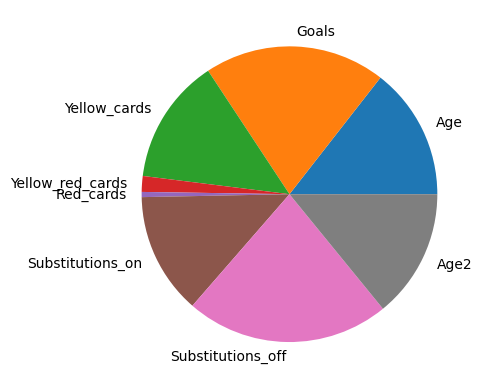

In [95]:
plt.pie(model.feature_importances_[1:],labels=variables[1:])